In [1]:
# Importing datasets
import pandas as pd
import numpy as np
from fbprophet import Prophet
from matplotlib import pyplot as plt
from fbprophet.diagnostics import cross_validation

In [2]:
df = pd.read_csv('niptrenddata.csv')

In [3]:
df.head()

,ds,y
0,4/27/2017,960323
1,4/28/2017,1063044
2,4/29/2017,899502
3,4/30/2017,486215
4,5/1/2017,513817


In [4]:
df['ds'] = pd.to_datetime(df['ds'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


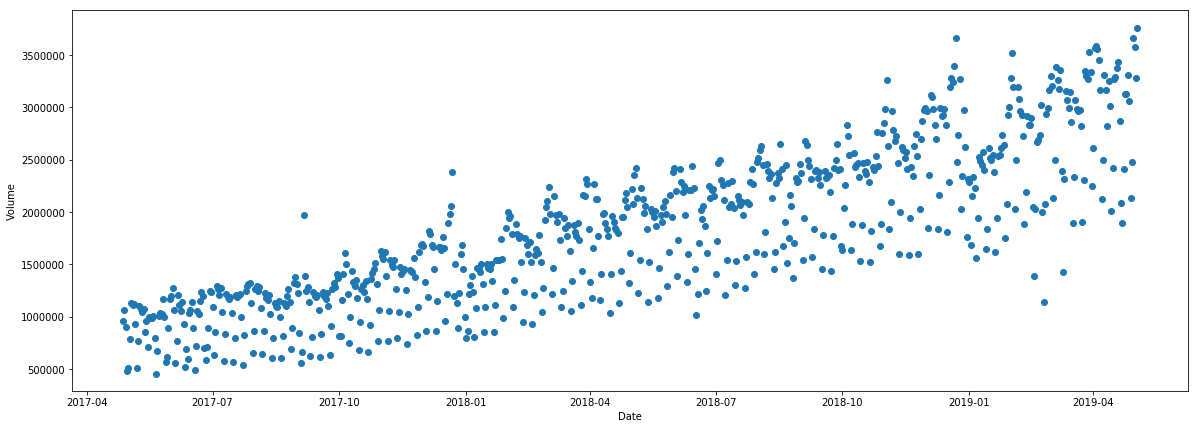

In [5]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(df['ds'], df['y'], linestyle='None', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Volume');

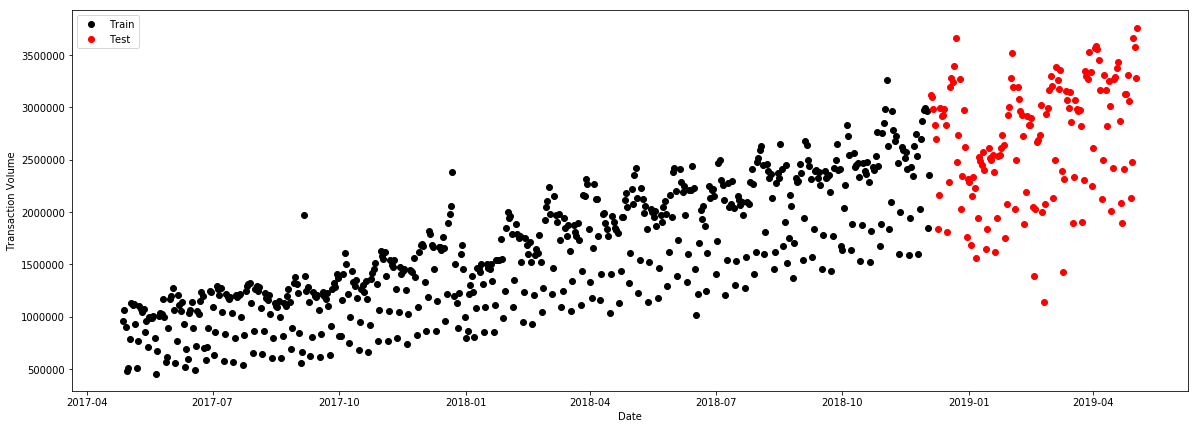

In [22]:
n_tests = 151
df_train = df[:-n_tests]
df_test = df[-n_tests:]
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(df_train['ds'], df_train['y'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(df_test['ds'], df_test['y'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Volume');

In [7]:
christmas_set = pd.DataFrame({
'holiday': 'christmas',
'ds': pd.to_datetime(['2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25']),
'lower_window': 0,
'upper_window': 1,
})
boxingday_set = pd.DataFrame({
'holiday': 'boxingday',
'ds': pd.to_datetime(['2016-12-26', '2017-12-26', '2018-12-26', '2019-12-26']),
'lower_window': 0,
'upper_window': 1,
})
holidays = pd.concat((christmas_set, boxingday_set))

In [8]:
model = Prophet(holidays=holidays)
model.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = model.make_future_dataframe(periods=30)
future.tail(n=5)

,ds
762,2019-05-29
763,2019-05-30
764,2019-05-31
765,2019-06-01
766,2019-06-02


In [10]:
future.head()

,ds
0,2017-04-27
1,2017-04-28
2,2017-04-29
3,2017-04-30
4,2017-05-01


In [11]:
forecast = model.predict(future)

In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n=35)

,ds,yhat,yhat_lower,yhat_upper
732,2019-04-29,2.607437e+06,2.351068e+06,2.856103e+06
733,2019-04-30,3.178027e+06,2.936088e+06,3.421184e+06
734,2019-05-01,3.170114e+06,2.915071e+06,3.410996e+06
735,2019-05-02,3.190981e+06,2.942265e+06,3.436914e+06
736,2019-05-03,3.273556e+06,3.019816e+06,3.511572e+06
737,2019-05-04,3.045698e+06,2.814647e+06,3.288158e+06
738,2019-05-05,2.393380e+06,2.125188e+06,2.637347e+06
739,2019-05-06,2.663640e+06,2.433169e+06,2.907275e+06
740,2019-05-07,3.236651e+06,2.987508e+06,3.474114e+06
741,2019-05-08,3.230317e+06,2.975608e+06,3.491363e+06


In [80]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(n=5)

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,-72787.480484,-340210.629922,2.098193e+05
1,2017-01-02,188895.186072,-92557.796460,4.762860e+05
2,2017-01-03,748908.324184,442473.925429,1.030943e+06
3,2017-01-04,738274.780154,447733.141462,9.978527e+05
4,2017-01-05,757827.928780,490871.055471,1.021918e+06


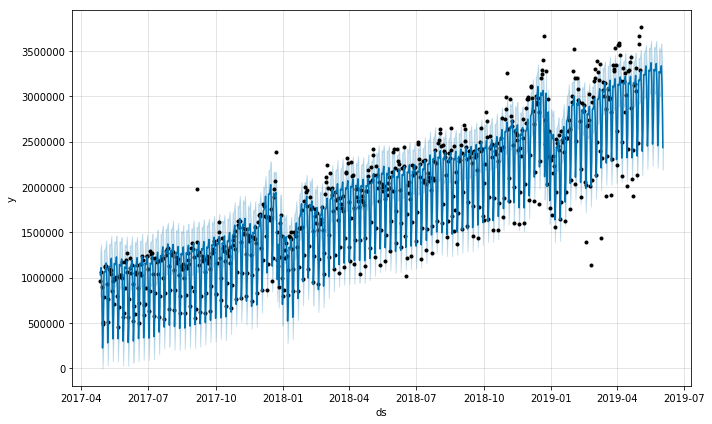

In [18]:
plot1 = model.plot(forecast)

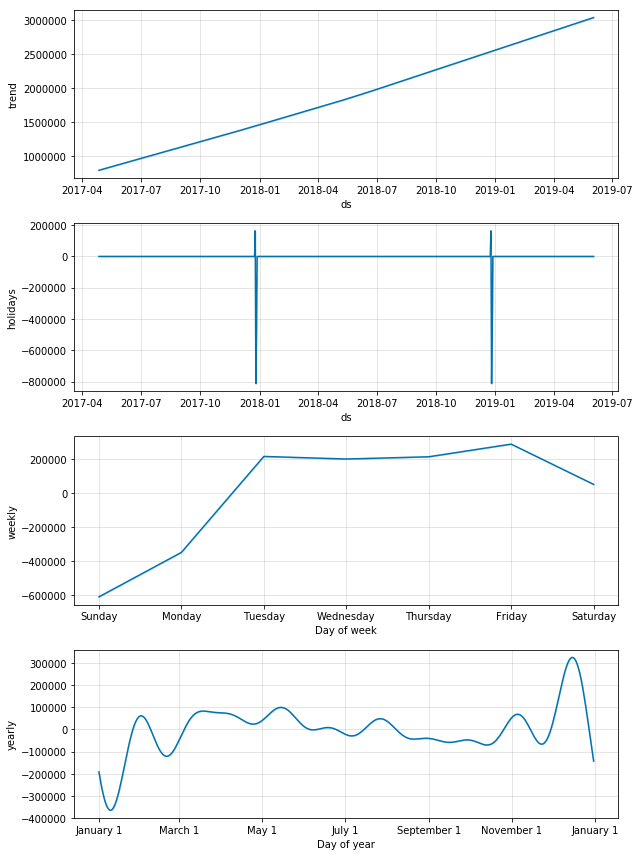

In [20]:
plot2 = model.plot_components(forecast)

In [21]:
# df_cv = cross_validation(model, 120, 'days')
df_cv = cross_validation(model, initial='270 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-02-07 00:00:00 and 2019-02-02 00:00:00
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype fro

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-08,1.846905e+06,1.686172e+06,2.006549e+06,1751682,2018-02-07
1,2018-02-09,1.901385e+06,1.747427e+06,2.065766e+06,1774010,2018-02-07
2,2018-02-10,1.684344e+06,1.529466e+06,1.835416e+06,1519150,2018-02-07
3,2018-02-11,1.234140e+06,1.084499e+06,1.393162e+06,951306,2018-02-07
4,2018-02-12,1.412305e+06,1.269105e+06,1.587719e+06,1237488,2018-02-07


In [23]:
df_cv.tail(n=35)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
775,2019-03-30,2.940938e+06,2.733723e+06,3.149621e+06,3342729,2019-02-02
776,2019-03-31,2.315857e+06,2.098734e+06,2.532741e+06,2244776,2019-02-02
777,2019-04-01,2.552733e+06,2.321993e+06,2.768836e+06,2615340,2019-02-02
778,2019-04-02,3.081201e+06,2.870687e+06,3.290899e+06,3564274,2019-02-02
779,2019-04-03,3.066557e+06,2.852248e+06,3.278599e+06,3584094,2019-02-02
780,2019-04-04,3.092144e+06,2.870887e+06,3.317564e+06,3561959,2019-02-02
781,2019-04-05,3.159059e+06,2.938973e+06,3.363385e+06,3457807,2019-02-02
782,2019-04-06,2.957516e+06,2.734204e+06,3.179262e+06,3170823,2019-02-02
783,2019-04-07,2.338757e+06,2.136477e+06,2.579147e+06,2124988,2019-02-02
784,2019-04-08,2.581548e+06,2.355860e+06,2.806777e+06,2495129,2019-02-02


In [27]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
98,9 days,5.789476e+10,240613.298184,183555.566141,0.089750,0.555556
369,10 days,5.784430e+10,240508.427937,183251.242110,0.089454,0.555556
9,10 days,5.716457e+10,239091.132038,181821.071971,0.089789,0.555556
189,10 days,5.804614e+10,240927.675209,184343.919998,0.091068,0.543210
99,10 days,5.810629e+10,241052.463471,184845.251857,0.091434,0.543210


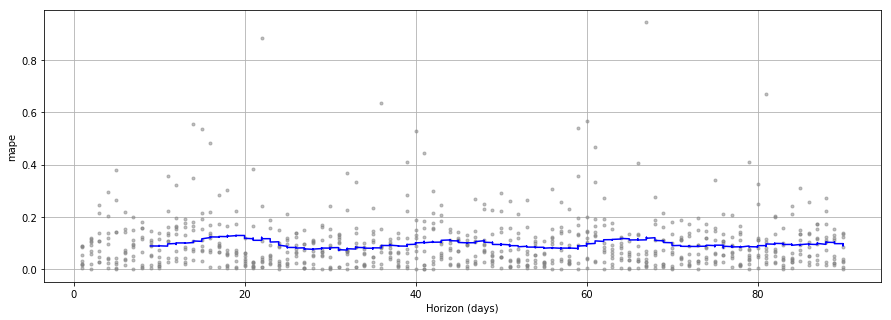

In [28]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',figsize=(15, 5))

In [29]:
df_cv2=df_cv.tail(n=100)
df_cv2.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
805,2019-04-29,2.691033e+06,2.483766e+06,2.922014e+06,2481955,2019-02-02
806,2019-04-30,3.220350e+06,2.989873e+06,3.426149e+06,3662723,2019-02-02
807,2019-05-01,3.205620e+06,2.990523e+06,3.431207e+06,3577341,2019-02-02
808,2019-05-02,3.230281e+06,3.013786e+06,3.451673e+06,3283692,2019-02-02
809,2019-05-03,3.295538e+06,3.089452e+06,3.537653e+06,3763120,2019-02-02


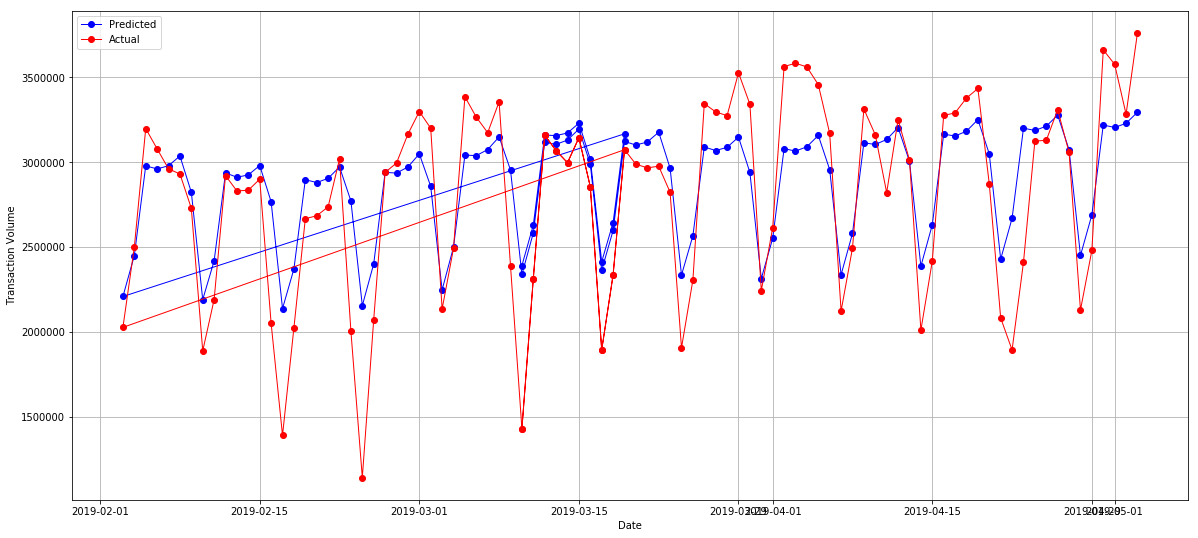

In [30]:
fig, ax = plt.subplots(figsize=(20, 9))
# Specify background color for the axis/plot
# ax.set_axis_bgcolor("magenta")
# fig, ax = plt.subplots(facecolor='lightslategray')

ax.plot(df_cv2['ds'], df_cv2['yhat'], marker='o', linestyle='-', linewidth=1.0, color='blue', label='Predicted')
ax.plot(df_cv2['ds'], df_cv2['y'], marker='o', linestyle='-', linewidth=1.0, color='red', label='Actual')
ax.grid(True)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Volume');
#<widget>.configure(background='black')

In [26]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe
